## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns 

import plotly.express as px
import folium
sns.set(color_codes=True)

from datetime import datetime 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Copy of Hotel Bookings.csv"

In [ ]:
df=pd.read_csv(path)
# df.info()

In [ ]:
# df.isna().sum()
df.shape

(119390, 32)

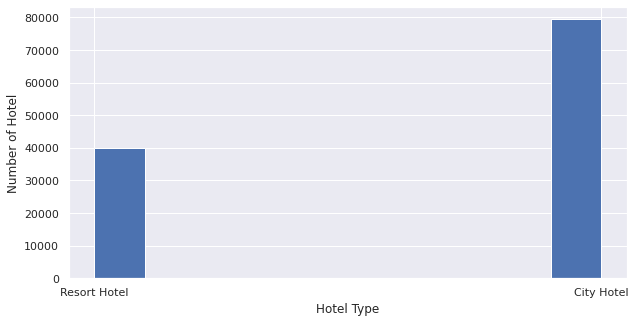

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.hist(df["hotel"])
plt.xlabel("Hotel Type")
plt.ylabel("Number of Hotel")
plt.show()

In [ ]:
newdf = df.drop(columns=["agent","company"])
# newdf.isna().sum()
newdf.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [ ]:
duplicate_rows_in_dataframe = newdf[newdf.duplicated()]
print("Number of duplicated Data:",duplicate_rows_in_dataframe.shape)

Number of duplicated Data: (32020, 30)


In [ ]:
newdf.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type   

In [ ]:
newdf=newdf.drop_duplicates()
newdf.count()

hotel                             87370
is_canceled                       87370
lead_time                         87370
arrival_date_year                 87370
arrival_date_month                87370
arrival_date_week_number          87370
arrival_date_day_of_month         87370
stays_in_weekend_nights           87370
stays_in_week_nights              87370
adults                            87370
children                          87366
babies                            87370
meal                              87370
country                           86918
market_segment                    87370
distribution_channel              87370
is_repeated_guest                 87370
previous_cancellations            87370
previous_bookings_not_canceled    87370
reserved_room_type                87370
assigned_room_type                87370
booking_changes                   87370
deposit_type                      87370
days_in_waiting_list              87370
customer_type                     87370


In [ ]:
newdf.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [ ]:
newdf=newdf.dropna()
newdf.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
newdf.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000,86914.000000
mean,0.275939,80.202741,2016.211842,26.841694,15.818453,1.007548,2.628955,1.878604,0.139253,0.010815,0.039246,0.030237,0.176761,0.271912,0.753722,106.580816,0.083473,0.699542
std,0.446989,86.102902,0.685989,13.654113,8.834539,1.028821,2.043860,0.625881,0.456848,0.113510,0.194180,0.369629,1.718139,0.728177,10.043309,54.959600,0.280440,0.831880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


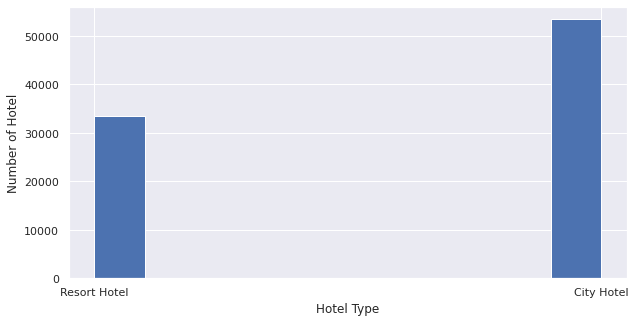

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.hist(newdf["hotel"])
plt.xlabel("Hotel Type")
plt.ylabel("Number of Hotel")
plt.show()

<Figure size 720x360 with 0 Axes>

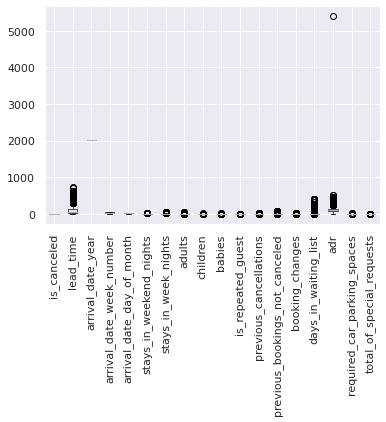

<Figure size 720x360 with 0 Axes>

In [ ]:
newdf.boxplot()
plt.xticks(rotation=90)
plt.figure(figsize=(10,5))

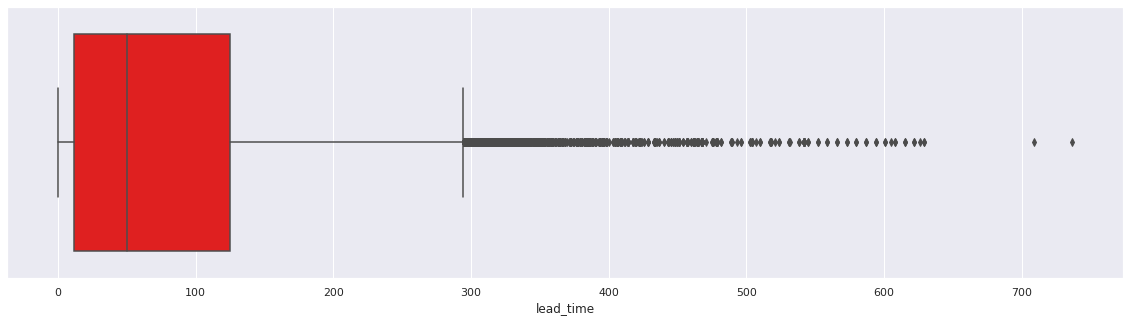

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=newdf["lead_time"],color="red")

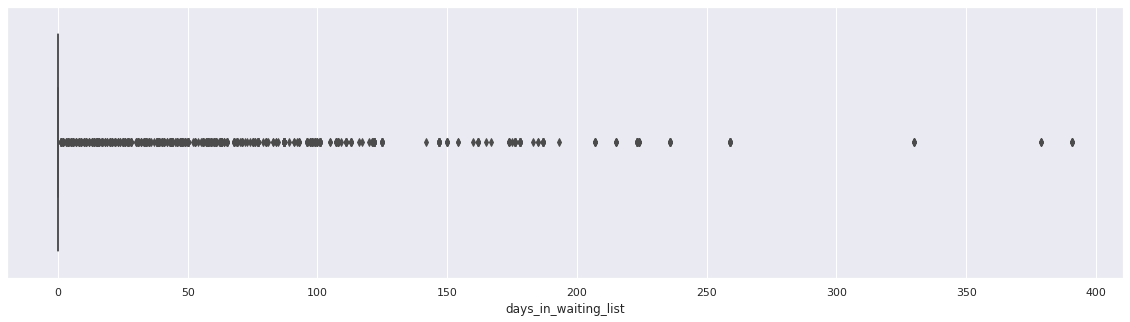

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(x=newdf["days_in_waiting_list"],color="blue")

In [ ]:
newdf.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

# Data visualisation


**The number of days waiting list**

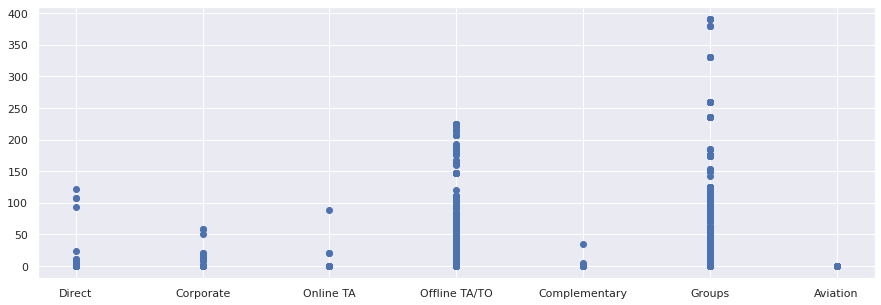

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(newdf.market_segment,newdf.days_in_waiting_list)

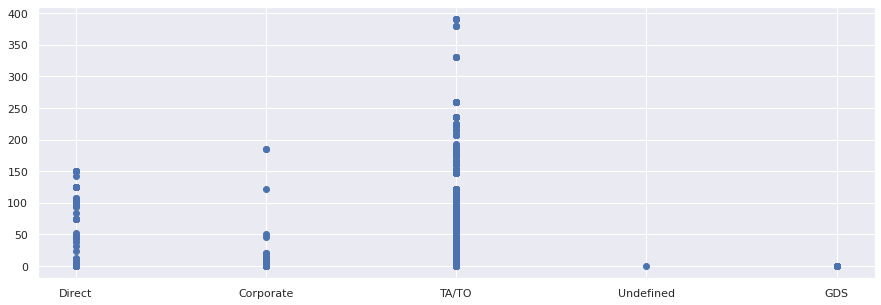

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
ax.scatter(newdf.distribution_channel,newdf.days_in_waiting_list)

**Most number of rooms booked in a month**

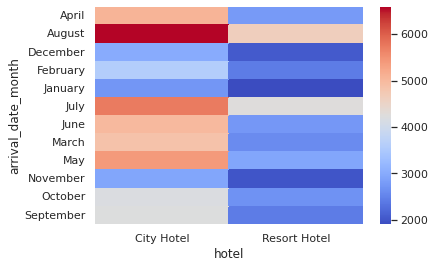

In [ ]:
sns.heatmap(pd.crosstab(newdf.arrival_date_month,newdf.hotel),cmap="coolwarm")

**Number of hotel booked in monthly**

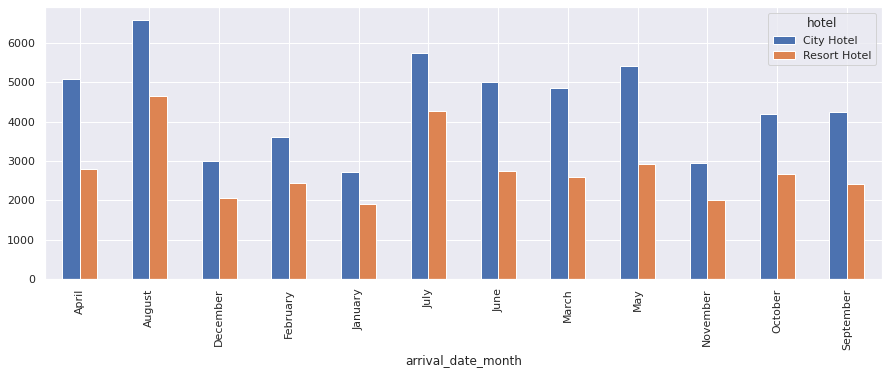

In [ ]:
hotel_booked = newdf.groupby(["arrival_date_month","hotel"]).size()
hotel_booked.unstack().plot(kind="bar",figsize=(15,5))

**Most number of hotel are canceled** 

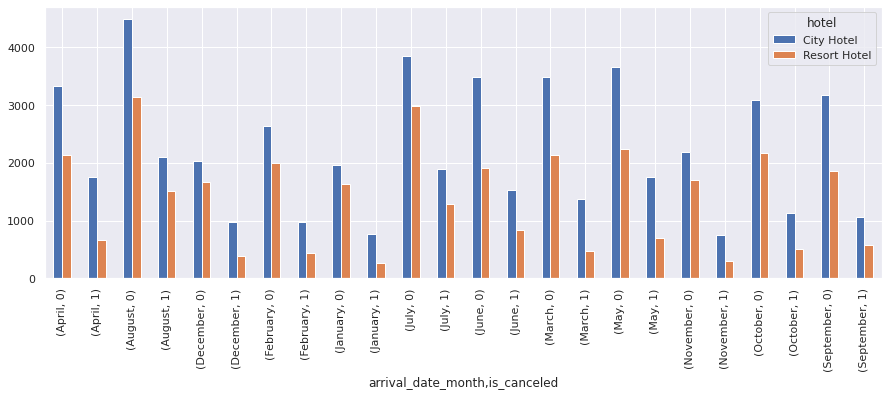

In [ ]:
hotel_canceled = newdf.groupby(["arrival_date_month","is_canceled","hotel"]).size()
hotel_canceled.unstack().plot(kind="bar",figsize=(15,5))

**Number of The reserved room type and assigned room type**

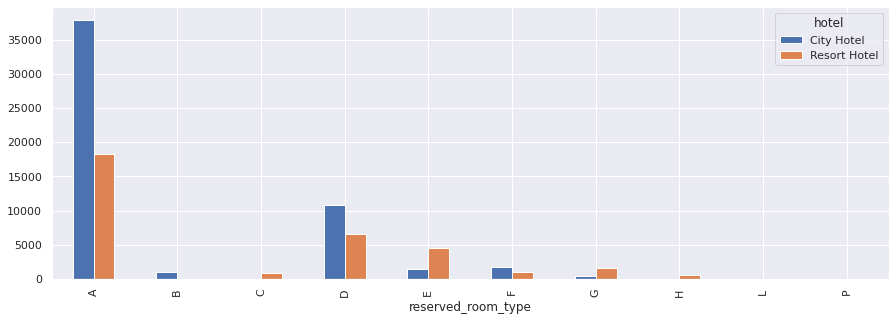

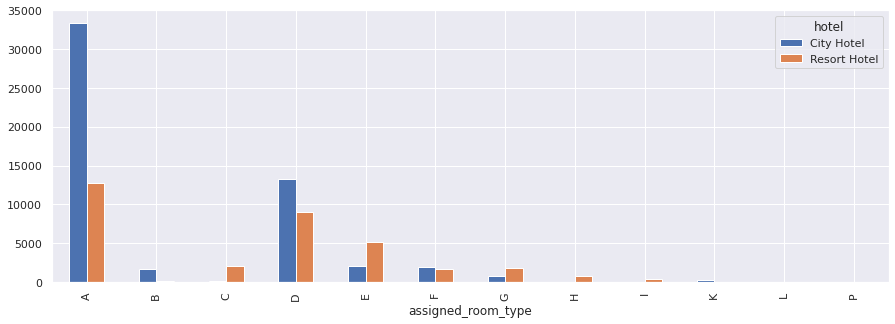

In [ ]:
reserved_room_type = newdf.groupby(["reserved_room_type","hotel"]).size()
reserved_room_type.unstack().plot(kind="bar",figsize=(15,5))

assigned_room_type = newdf.groupby(["assigned_room_type","hotel"]).size()
assigned_room_type.unstack().plot(kind="bar",figsize=(15,5))

In [ ]:
newdf.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02


**Most number of rooms booked in market segment**

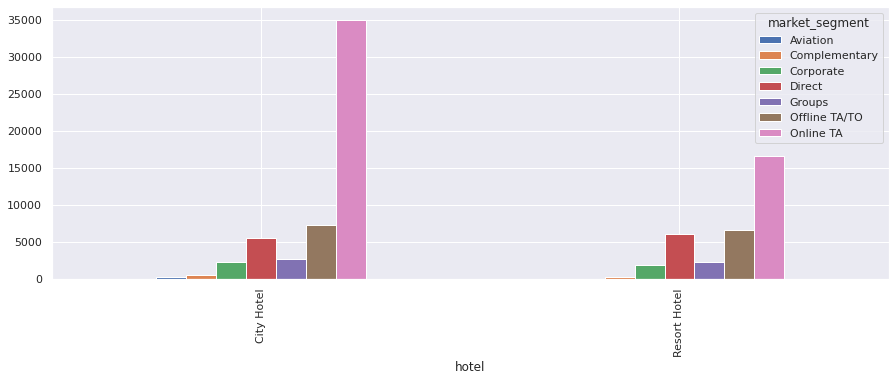

In [ ]:
rooms_booked = newdf.groupby(["hotel","market_segment"]).size()
rooms_booked.unstack().plot(kind="bar",figsize=(15,5))

**Most number of rooms booked in distribution channel**

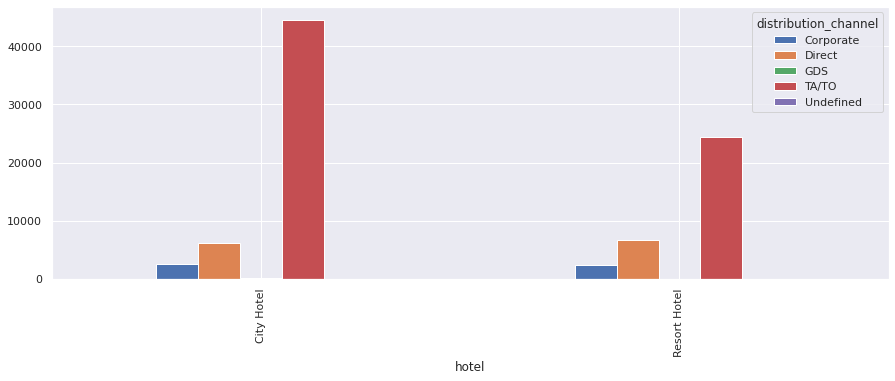

In [ ]:
rooms_booked_by_channel = newdf.groupby(["hotel","distribution_channel"]).size()
rooms_booked_by_channel.unstack().plot(kind="bar",figsize=(15,5))

In [ ]:
list(newdf.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

**Hotel was likely to receive a disproportionately high number of special requests**

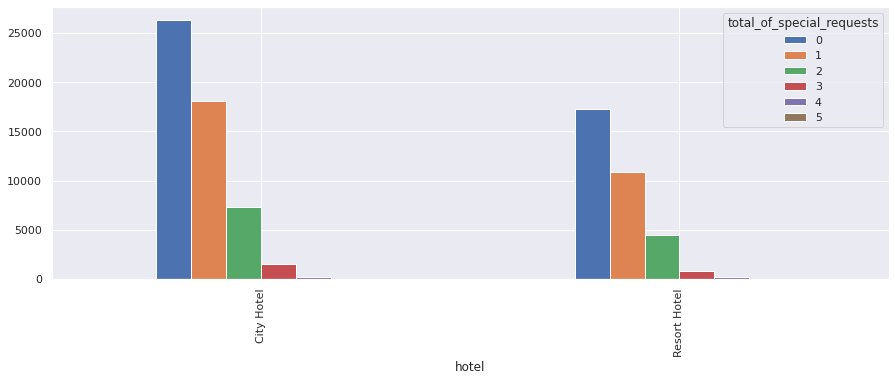

In [ ]:
Total_of_special_requests = newdf.groupby(["hotel","total_of_special_requests"]).size()
Total_of_special_requests.unstack().plot(kind="bar",figsize=(15,5))

In [ ]:
# ["total_of_special_requests","adults","children","babies"]

**Review status of rooms in hotel**

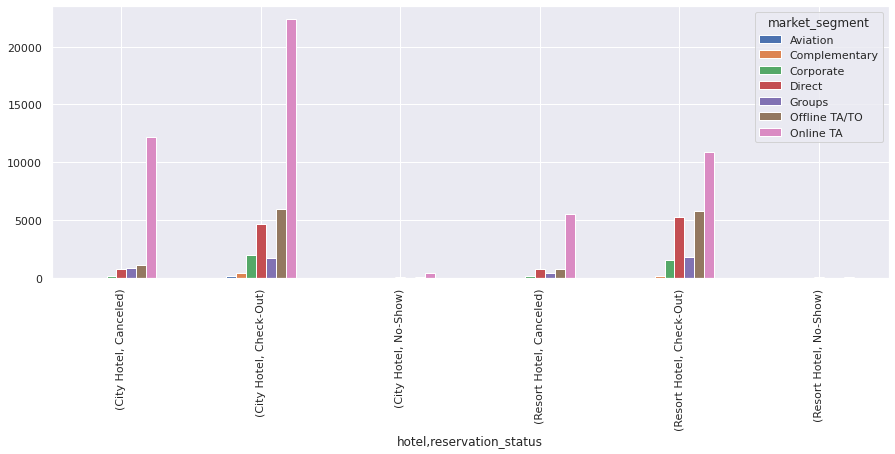

In [ ]:
Total_of_special_requests = newdf.groupby(["hotel","reservation_status","market_segment"]).size()
Total_of_special_requests.unstack().plot(kind="bar",figsize=(15,5))

**Rooms reserved room type and assigned room type**

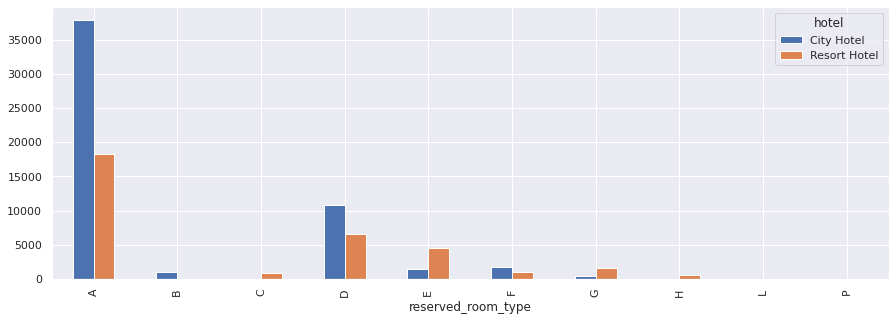

In [ ]:
room_type=newdf.groupby(["reserved_room_type","hotel"]).size()
room_type.unstack().plot(kind="bar",figsize=(15,5))

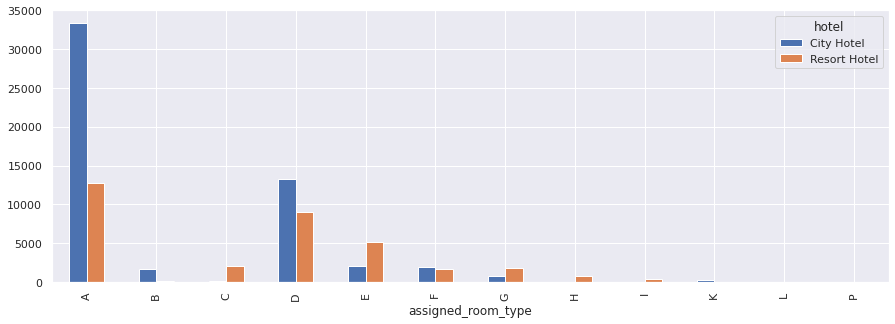

In [ ]:
room_type=newdf.groupby(["assigned_room_type","hotel"]).size()
room_type.unstack().plot(kind="bar",figsize=(15,5))

**Finding the Monthly and Days in waiting list**

Text(0.5, 1.0, 'Monthly vs Days in waiting list')

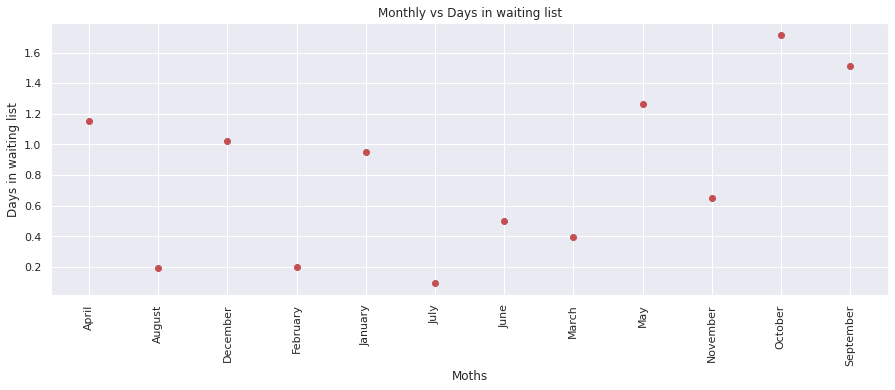

In [ ]:
plt.figure(figsize=(15,5))
mothly_view=newdf.groupby("arrival_date_month")
plt.plot(mothly_view["days_in_waiting_list"].agg(np.mean),"ro",color="r")
plt.xticks(rotation="90")
plt.xlabel("Moths")
plt.ylabel("Days in waiting list")
plt.title("Monthly vs Days in waiting list")

**Finding th correlation between the columns in DataFrame**

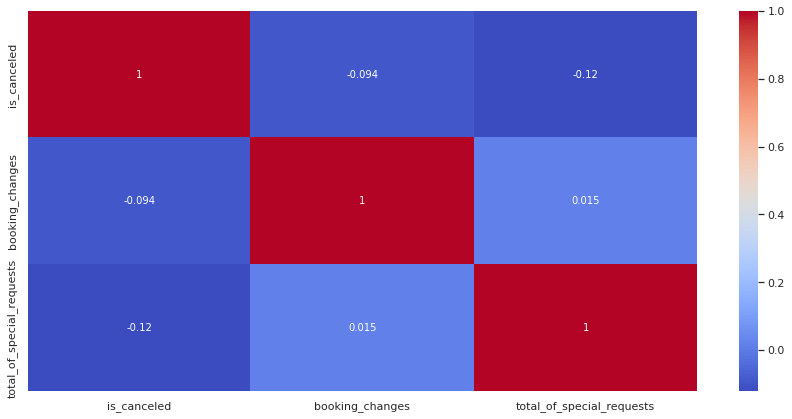

In [ ]:
plt.figure(figsize=(15,7))
ne1=newdf[["is_canceled","booking_changes","total_of_special_requests"]]
sns.heatmap(ne1.corr(),cmap="coolwarm",annot=True)

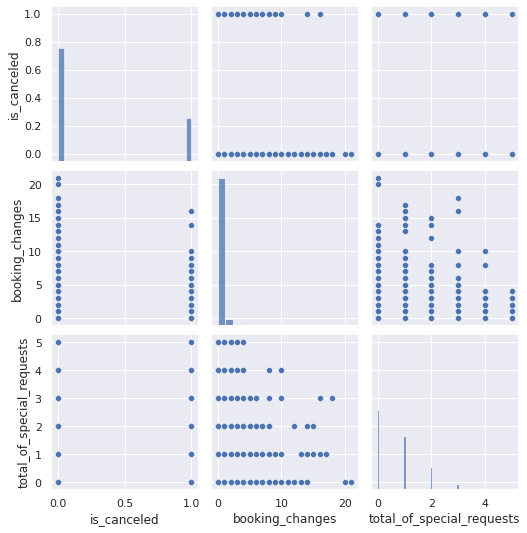

In [ ]:
sns.pairplot(ne1)

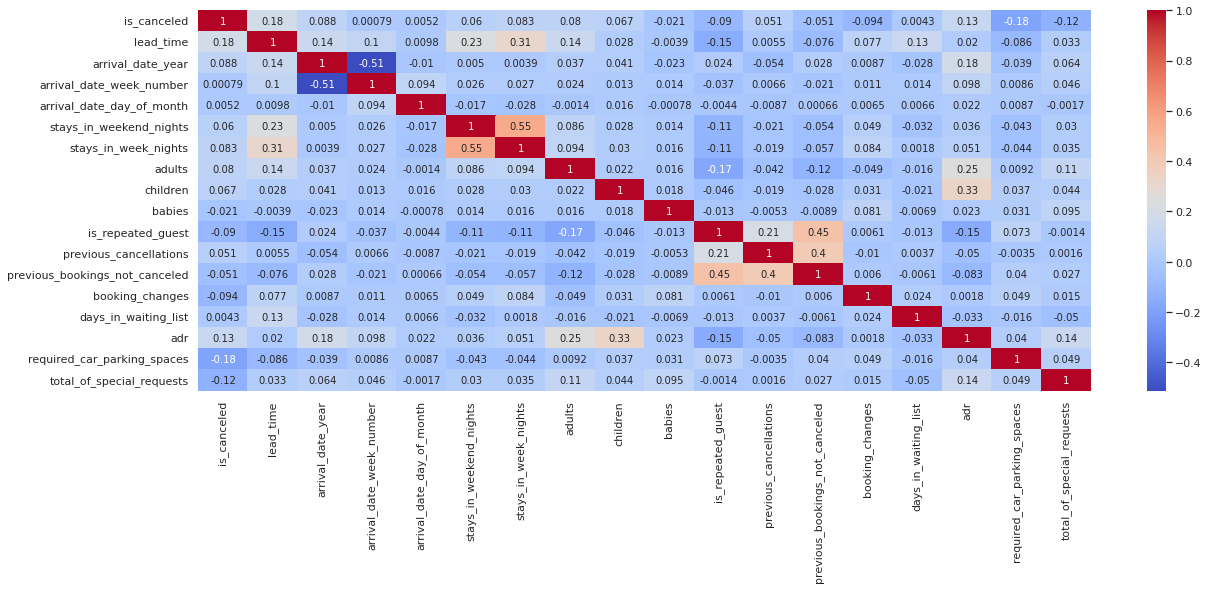

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(newdf.corr(),cmap="coolwarm",annot=True)

In [ ]:
newdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:

# g= sns.FacetGrid(newdf,row="reserved_room_type")
# g.map_dataframe(sns.histplot,"assigned_room_type")

In [ ]:
# q1=newdf.quantile(0.25)
# q2=newdf.quantile(0.75)
# IQR=q2-q1
# print("\ninternalQuartileRange=n/",IQR)
# newdf1=newdf[~((newdf<(q1-1.5*IQR))|(newdf>(q2-1.5*IQR))).any(axis=1)]
# newdf1.shape

In [ ]:
# newdf.groupby('hotel')['hotel'].count()

In [ ]:
# total_weekendnight = newdf.groupby(['arrival_date_year']).sum()['stays_in_weekend_nights'].reset_index()
# total_weeknight = newdf.groupby(['arrival_date_year']).sum()['stays_in_week_nights'].reset_index()
# # total_weeknight.head(10)
# total_weekendnight.head(10)

In [ ]:
# # plot the chart for given dataframe
# plt.rcParams["figure.figsize"]=(10,5)
# plt.plot(total_weekendnight["arrival_date_year"], total_weekendnight['stays_in_weekend_nights'])
# plt.title("Rooms Sold Per year in Weekend Night")
# plt.xlabel('Years')
# plt.ylabel("Rooms Sold")

In [ ]:
# plt.plot(total_weeknight["arrival_date_year"], total_weeknight['stays_in_week_nights'])
# plt.title("Rooms Sold Per year in weekDays")
# plt.xlabel('Years')
# plt.ylabel("Rooms Sold")
# # plt.xticks()

In [ ]:
# df2015=newdf.loc[newdf["arrival_date_year"]==2015]
# df2015.arrival_date_month
# total_weekendnight_2015 = df2015.groupby(['arrival_date_month']).sum()['stays_in_weekend_nights'].reset_index()

# plt.rcParams["figure.figsize"]=(10,5)
# plt.plot(total_weekendnight_2015["arrival_date_month"], total_weekendnight_2015['stays_in_weekend_nights'])
# plt.title("Rooms Sold Per year in Weekend Night")
# plt.xlabel('Months')
# plt.ylabel("Rooms Sold")

In [ ]:
# df2015=newdf.loc[newdf["arrival_date_year"]==2016]
# df2015.arrival_date_month
# total_weekendnight_2015 = df2015.groupby(['arrival_date_month']).sum()['stays_in_weekend_nights'].reset_index()
# total_weekendnight_2015
# plt.rcParams["figure.figsize"]=(10,5)
# plt.plot(total_weekendnight_2015["arrival_date_month"], total_weekendnight_2015['stays_in_weekend_nights'])
# plt.title("Rooms Sold Per year in Weekend Night")
# plt.xlabel('Months')
# plt.ylabel("Rooms Sold")

In [ ]:
# df2015=newdf.loc[newdf["arrival_date_year"]==2017]
# df2015.arrival_date_month
# total_weekendnight_2015 = df2015.groupby(['arrival_date_month']).sum()['stays_in_weekend_nights'].reset_index()
# total_weekendnight_2015
# plt.rcParams["figure.figsize"]=(10,5)
# plt.plot(total_weekendnight_2015["arrival_date_month"], total_weekendnight_2015['stays_in_weekend_nights'])
# plt.title("Rooms Sold Per year in Weekend Night")
# plt.xlabel('Months')
# plt.ylabel("Rooms Sold")